##Name: Shiv Taneja
##Reg no. 19BAI10039


In This assignment, I tried to train 5 Deep learning Models for Image 
Classification which are: VGG19,VGG16,ResNet101,MobileNet_V2 and Xception.

I have also Visulaized their accuracy and loss functions after training the models.



In [1]:
#unzipping the dataset
!unzip '/content/loopr_vit_dse_assignment_data.zip'

Archive:  /content/loopr_vit_dse_assignment_data.zip
   creating: loopr_vit_dse_assignment_data/
   creating: loopr_vit_dse_assignment_data/bishop_resized/
  inflating: loopr_vit_dse_assignment_data/bishop_resized/00000000_resized.jpg  
  inflating: loopr_vit_dse_assignment_data/bishop_resized/00000002_resized.jpg  
  inflating: loopr_vit_dse_assignment_data/bishop_resized/00000003_resized.jpg  
  inflating: loopr_vit_dse_assignment_data/bishop_resized/00000004_resized.jpg  
  inflating: loopr_vit_dse_assignment_data/bishop_resized/00000005_resized.jpg  
  inflating: loopr_vit_dse_assignment_data/bishop_resized/00000006_resized.jpg  
  inflating: loopr_vit_dse_assignment_data/bishop_resized/00000008_resized.jpg  
  inflating: loopr_vit_dse_assignment_data/bishop_resized/00000009_resized.jpg  
  inflating: loopr_vit_dse_assignment_data/bishop_resized/00000010_resized.jpg  
  inflating: loopr_vit_dse_assignment_data/bishop_resized/00000013_resized.jpg  
  inflating: loopr_vit_dse_assignm

In [25]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.applications import vgg19,vgg16,ResNet101,mobilenet_v2,xception

##VISUALIZATIONS

In the section below, images are preprocessed using ImageDataGenerator of TensorFlow module.

I have also prepared some visualizations of the images.

In [37]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

image_size = (200, 200)
batch_size = 32

train_ds = image_dataset_from_directory(
    "/content/loopr_vit_dse_assignment_data",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =image_dataset_from_directory(
    "/content/loopr_vit_dse_assignment_data",
    labels = "inferred",
    label_mode = 'int',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 651 files belonging to 5 classes.
Using 521 files for training.
Found 651 files belonging to 5 classes.
Using 130 files for validation.


In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255., # rescaling
                                   rotation_range = 40,  # for augmentation
                                   width_shift_range = 0.2,
                                   validation_split = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory("/content/loopr_vit_dse_assignment_data",
                                                    batch_size = 32,
                                                    subset="training",
                                                    class_mode = 'binary', 
                                                    target_size = (200, 200))

val_generator = train_datagen.flow_from_directory("/content/loopr_vit_dse_assignment_data",
                                                subset = "validation",
                                                    batch_size = 32,
                                                    class_mode='binary', 
                                                    target_size = (200, 200))

Found 523 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


In [38]:
!pip install opencv-python

import cv2
import random
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


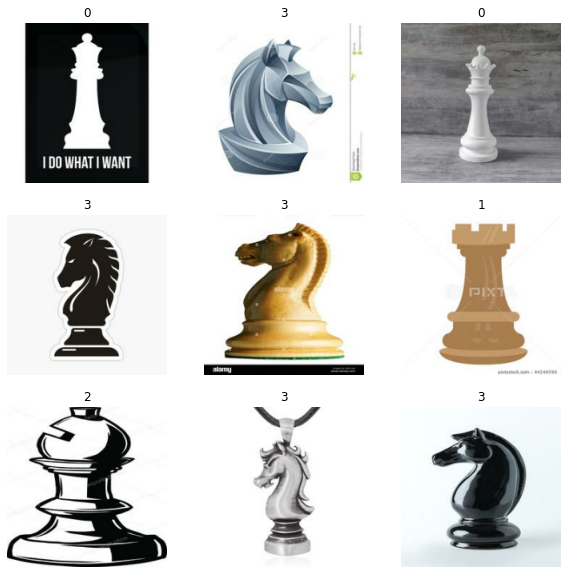

In [39]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

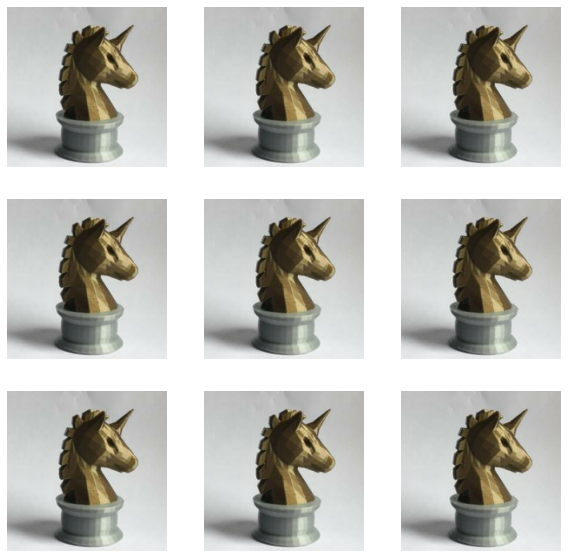

In [53]:
#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal'),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.6)
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

##Model Training and Tuning

This section contains how the models are trained and tuned to give best results on the Dataset

In each of the models only Convolution layers are used, Neuron layers in each model are designed are self designed.

This section also contains visulaization of loss and accuracy of their respective model

##VGG19 Model

In [4]:
#this cell contains details convolution details of VGG19 Model
vgg=vgg19.VGG19(weights='imagenet',include_top=False,input_shape=(200,200,3))
vgg.summary()

from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

for layer in vgg.layers:
  layer.trainable=True

for layer in vgg.layers:
  print(layer,layer.trainable)



80134624/80134624 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

In [29]:
model_vgg=tf.keras.models.Sequential()

# Add the vgg convolutional base model
model_vgg.add(vgg)

# add flatten layer
model_vgg.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model_vgg.add(tf.keras.layers.Dense(256, activation='relu'))
model_vgg.add(tf.keras.layers.Dropout(rate=0.3))
model_vgg.add(tf.keras.layers.Dense(256, activation='relu'))
model_vgg.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model_vgg.add(tf.keras.layers.Dense(5, activation='softmax'))

# compile model
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model_vgg.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               4718848   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                

In [30]:
result_vgg=model_vgg.fit(train_generator,validation_data=val_generator,callbacks=callback,epochs=15)


Epoch 1/15
17/17 [==============================] - 10s 515ms/step - loss: 1.6827 - accuracy: 0.2868 - val_loss: 1.1767 - val_accuracy: 0.6172
Epoch 2/15
17/17 [==============================] - 8s 480ms/step - loss: 1.1522 - accuracy: 0.5468 - val_loss: 0.6272 - val_accuracy: 0.7812
Epoch 3/15
17/17 [==============================] - 8s 479ms/step - loss: 0.6841 - accuracy: 0.7419 - val_loss: 0.3803 - val_accuracy: 0.8438
Epoch 4/15
17/17 [==============================] - 9s 523ms/step - loss: 0.6193 - accuracy: 0.7839 - val_loss: 0.3532 - val_accuracy: 0.8750
Epoch 5/15
17/17 [==============================] - 9s 521ms/step - loss: 0.5243 - accuracy: 0.8222 - val_loss: 0.2977 - val_accuracy: 0.9062
Epoch 6/15
17/17 [==============================] - 8s 482ms/step - loss: 0.5034 - accuracy: 0.8069 - val_loss: 0.2020 - val_accuracy: 0.9375
Epoch 7/15
17/17 [==============================] - 8s 479ms/step - loss: 0.3984 - accuracy: 0.8470 - val_loss: 0.2371 - val_accuracy: 0.9141
Epoch

In [31]:
model_vgg.save('vgg19_model')

#Visualization of loss and Accuracy of VGG19 model

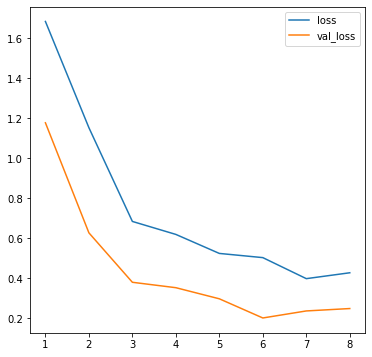

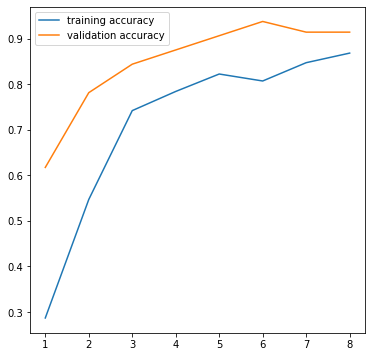

In [73]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6)) 

loss1=result_vgg.history['loss']
val_loss1=result_vgg.history['val_loss']
epochs=range(1,len(loss1)+1)

plt.plot(epochs,loss1,label='loss')
plt.plot(epochs,val_loss1,label='val_loss')

plt.legend()


plt.figure(figsize=(6,6))

acc1=result_vgg.history['accuracy']
val_acc1=result_vgg.history['val_accuracy']

plt.plot(epochs,acc1,label='training accuracy')
plt.plot(epochs,val_acc1,label='validation accuracy')

plt.legend()


##VGG16 Model

In [32]:
#this cell contains details convolution details of VGG16 Model
vgg16=vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(200,200,3))
vgg16.summary()

for layer in vgg16.layers:
  layer.trainable=True

for layer in vgg16.layers:
  print(layer,layer.trainable)


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [33]:
model_vgg16=tf.keras.models.Sequential()

# Add the vgg convolutional base model
model_vgg16.add(vgg)

# add flatten layer
model_vgg16.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model_vgg16.add(tf.keras.layers.Dense(256, activation='relu'))
model_vgg16.add(tf.keras.layers.Dropout(rate=0.3))
model_vgg16.add(tf.keras.layers.Dense(256, activation='relu'))
model_vgg16.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model_vgg16.add(tf.keras.layers.Dense(5, activation='softmax'))

# compile model
model_vgg16.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model_vgg16.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               4718848   
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 5)                

In [34]:
result_vgg16=model_vgg16.fit(train_generator,validation_data=val_generator,callbacks=callback,epochs=15)

Epoch 1/15
17/17 [==============================] - 10s 511ms/step - loss: 1.6399 - accuracy: 0.3040 - val_loss: 1.1110 - val_accuracy: 0.6328
Epoch 2/15
17/17 [==============================] - 8s 483ms/step - loss: 1.0486 - accuracy: 0.5966 - val_loss: 0.5065 - val_accuracy: 0.8750
Epoch 3/15
17/17 [==============================] - 8s 484ms/step - loss: 0.7416 - accuracy: 0.7228 - val_loss: 0.3173 - val_accuracy: 0.8828
Epoch 4/15
17/17 [==============================] - 10s 559ms/step - loss: 0.6050 - accuracy: 0.7859 - val_loss: 0.2715 - val_accuracy: 0.9062
Epoch 5/15
17/17 [==============================] - 8s 487ms/step - loss: 0.4665 - accuracy: 0.8375 - val_loss: 0.2718 - val_accuracy: 0.9062
Epoch 6/15
17/17 [==============================] - 8s 503ms/step - loss: 0.4654 - accuracy: 0.8298 - val_loss: 0.2098 - val_accuracy: 0.9297
Epoch 7/15
17/17 [==============================] - 9s 498ms/step - loss: 0.4409 - accuracy: 0.8566 - val_loss: 0.2981 - val_accuracy: 0.8750
Epoc

In [35]:
model_vgg16.save('vgg16_model')

##Visualization of Loss and Accuracy of VGG16 model

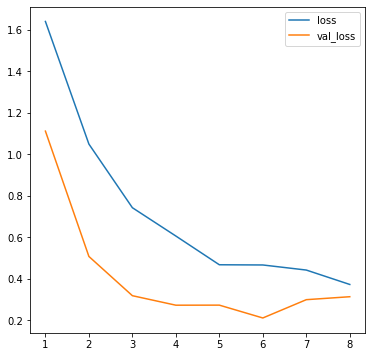

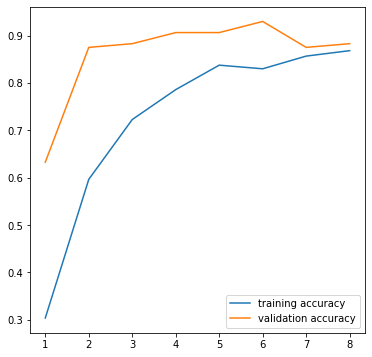

In [72]:

plt.figure(figsize=(6,6)) 
loss1=result_vgg16.history['loss']
val_loss1=result_vgg16.history['val_loss']
epochs=range(1,len(loss1)+1)

plt.plot(epochs,loss1,label='loss')
plt.plot(epochs,val_loss1,label='val_loss')

plt.legend()


plt.figure(figsize=(6,6))

acc1=result_vgg16.history['accuracy']
val_acc1=result_vgg16.history['val_accuracy']

plt.plot(epochs,acc1,label='training accuracy')
plt.plot(epochs,val_acc1,label='validation accuracy')

plt.legend()

##ResNet101 Model

In [49]:
#this cell contains details convolution details of ResNet101 Model
res101_layers=ResNet101(weights='imagenet',include_top=False,input_shape=(200,200,3),pooling='max')

res101_layers.summary()

for layer in res101_layers.layers:
  layer.trainable=True

for layer in res101_layers.layers:
  print(layer,layer.trainable)

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [54]:
#layers are added to the base model
model_res101=tf.keras.models.Sequential()
model_res101.add(res101_layers)

#add Flatten Layer
model_res101.add(tf.keras.layers.Flatten())

#add dense layer with dropout
model_res101.add(tf.keras.layers.Dense(1024,activation='relu'))
model_res101.add(tf.keras.layers.Dropout(0.3))
model_res101.add(tf.keras.layers.Dense(768,activation='relu'))
model_res101.add(tf.keras.layers.Dropout(0.3))
model_res101.add(tf.keras.layers.Dense(256,activation='relu'))
model_res101.add(tf.keras.layers.Dropout(0.3))
model_res101.add(tf.keras.layers.Dense(5,activation='softmax'))

model_res101.summary()

model_res101.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4),
                loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 flatten_11 (Flatten)        (None, 2048)              0         
                                                                 
 dense_40 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_29 (Dropout)        (None, 1024)              0         
                                                                 
 dense_41 (Dense)            (None, 768)               787200    
                                                                 
 dropout_30 (Dropout)        (None, 768)               0         
                                                                 
 dense_42 (Dense)            (None, 256)             

In [56]:
result_res101=model_res101.fit(train_generator,validation_data=val_generator,epochs=20)

Epoch 1/20
17/17 [==============================] - 11s 642ms/step - loss: 0.5654 - accuracy: 0.8432 - val_loss: 0.5603 - val_accuracy: 0.7734
Epoch 2/20
17/17 [==============================] - 11s 629ms/step - loss: 0.4372 - accuracy: 0.8470 - val_loss: 0.4007 - val_accuracy: 0.8672
Epoch 3/20
17/17 [==============================] - 11s 625ms/step - loss: 0.3820 - accuracy: 0.8604 - val_loss: 0.3053 - val_accuracy: 0.8984
Epoch 4/20
17/17 [==============================] - 11s 630ms/step - loss: 0.3122 - accuracy: 0.9082 - val_loss: 0.3240 - val_accuracy: 0.9062
Epoch 5/20
17/17 [==============================] - 11s 615ms/step - loss: 0.3377 - accuracy: 0.9120 - val_loss: 1.3188 - val_accuracy: 0.7656
Epoch 6/20
17/17 [==============================] - 11s 640ms/step - loss: 0.3452 - accuracy: 0.8853 - val_loss: 0.4528 - val_accuracy: 0.8906
Epoch 7/20
17/17 [==============================] - 11s 614ms/step - loss: 0.2034 - accuracy: 0.9312 - val_loss: 0.1690 - val_accuracy: 0.9531

In [57]:
model_res101.save('res101model')

##Visualization of loss and accuracy of ResNet101 model

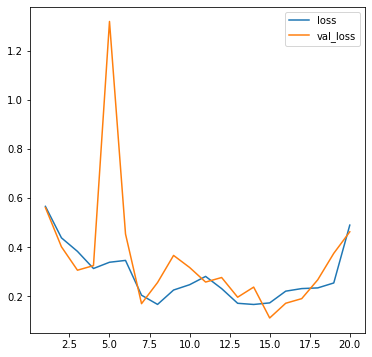

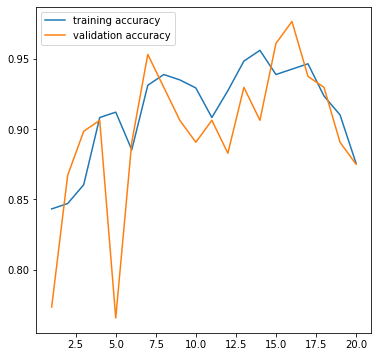

In [71]:

plt.figure(figsize=(6,6)) 
loss1=result_res101.history['loss']
val_loss1=result_res101.history['val_loss']
epochs=range(1,len(loss1)+1)

plt.plot(epochs,loss1,label='loss')
plt.plot(epochs,val_loss1,label='val_loss')

plt.legend()


plt.figure(figsize=(6,6))

acc1=result_res101.history['accuracy']
val_acc1=result_res101.history['val_accuracy']

plt.plot(epochs,acc1,label='training accuracy')
plt.plot(epochs,val_acc1,label='validation accuracy')

plt.legend()

##MobileNet_V2 Model

In [60]:
#this cell contains details convolution details of MobileNet_V2 Model
mobile_layers=mobilenet_v2.MobileNetV2(weights='imagenet',include_top=False,input_shape=(200,200,3))

mobile_layers.summary()

for layer in mobile_layers.layers:
  layer.trainable=True

for layer in mobile_layers.layers:
  print(layer,layer.trainable)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 100, 100, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 100, 100, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [63]:
model_mobile=tf.keras.models.Sequential()

# Add the vgg convolutional base model
model_mobile.add(mobile_layers)

# add flatten layer
model_mobile.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model_mobile.add(tf.keras.layers.Dense(256, activation='relu'))
model_mobile.add(tf.keras.layers.Dropout(rate=0.3))
model_mobile.add(tf.keras.layers.Dense(256, activation='relu'))
model_mobile.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model_mobile.add(tf.keras.layers.Dense(5, activation='softmax'))

# compile model
model_mobile.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model_mobile.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_13 (Flatten)        (None, 62720)             0         
                                                                 
 dense_47 (Dense)            (None, 256)               16056576  
                                                                 
 dropout_34 (Dropout)        (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 256)               65792     
                                                                 
 dropout_35 (Dropout)        (None, 256)               0         
                                                     

In [65]:
result_mobile=model_mobile.fit(train_generator,validation_data=val_generator,callbacks=callback,epochs=20)

Epoch 1/20
17/17 [==============================] - 8s 474ms/step - loss: 0.6155 - accuracy: 0.7782 - val_loss: 0.4643 - val_accuracy: 0.8125
Epoch 2/20
17/17 [==============================] - 7s 397ms/step - loss: 0.5773 - accuracy: 0.7706 - val_loss: 0.3920 - val_accuracy: 0.8594
Epoch 3/20
17/17 [==============================] - 7s 394ms/step - loss: 0.5839 - accuracy: 0.7992 - val_loss: 0.4282 - val_accuracy: 0.8438
Epoch 4/20
17/17 [==============================] - 7s 436ms/step - loss: 0.5092 - accuracy: 0.8241 - val_loss: 0.4090 - val_accuracy: 0.8672


In [66]:
model_mobile.save('mobilenet_model')

##visualization of loos and accuracy for MobileNet_V2 model

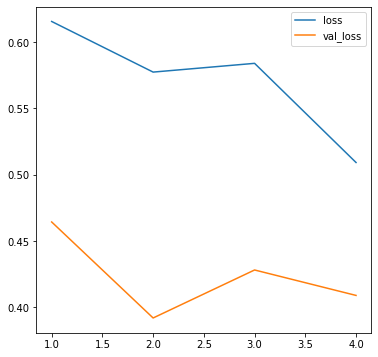

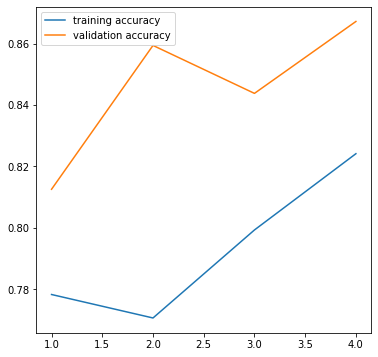

In [74]:

plt.figure(figsize=(6,6)) 

loss1=result_mobile.history['loss']
val_loss1=result_mobile.history['val_loss']
epochs=range(1,len(loss1)+1)

plt.plot(epochs,loss1,label='loss')
plt.plot(epochs,val_loss1,label='val_loss')

plt.legend()


plt.figure(figsize=(6,6))

acc1=result_mobile.history['accuracy']
val_acc1=result_mobile.history['val_accuracy']

plt.plot(epochs,acc1,label='training accuracy')
plt.plot(epochs,val_acc1,label='validation accuracy')

plt.legend()

##Xception Model

In [27]:
#this cell contains details convolution details of xception Model
xception_layers=xception.Xception(weights='imagenet',include_top=False,input_shape=(200,200,3))
xception_layers.summary()


Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 99, 99, 32)   864         ['input_3[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 99, 99, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [29]:
#adding Dennse layerrs with flatten layer and some Dropout
model_xception=tf.keras.models.Sequential()
model_xception.add(xception_layers)
model_xception.add(tf.keras.layers.Flatten())
model_xception.add(tf.keras.layers.Dense(1024,activation='relu'))
model_xception.add(tf.keras.layers.Dropout(0.3))
model_xception.add(tf.keras.layers.Dense(768,activation='relu'))
model_xception.add(tf.keras.layers.Dropout(0.3))
model_xception.add(tf.keras.layers.Dense(256,activation='relu'))
model_xception.add(tf.keras.layers.Dropout(0.3))
model_xception.add(tf.keras.layers.Dense(5,activation='softmax'))

model_xception.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_21 (Dense)            (None, 1024)              102761472 
                                                                 
 dropout_12 (Dropout)        (None, 1024)              0         
                                                                 
 dense_22 (Dense)            (None, 768)               787200    
                                                                 
 dropout_13 (Dropout)        (None, 768)               0         
                                                                 
 dense_23 (Dense)            (None, 256)              

In [35]:
model_xception.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model_xception.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_21 (Dense)            (None, 1024)              102761472 
                                                                 
 dropout_12 (Dropout)        (None, 1024)              0         
                                                                 
 dense_22 (Dense)            (None, 768)               787200    
                                                                 
 dropout_13 (Dropout)        (None, 768)               0         
                                                                 
 dense_23 (Dense)            (None, 256)              

In [36]:
result_x=model_xception.fit(train_generator,validation_data=val_generator,callbacks=callback,epochs=20)

Epoch 1/20
17/17 [==============================] - 21s 765ms/step - loss: 0.3677 - accuracy: 0.9159 - val_loss: 0.7925 - val_accuracy: 0.8984
Epoch 2/20
17/17 [==============================] - 12s 711ms/step - loss: 0.1791 - accuracy: 0.9503 - val_loss: 0.5375 - val_accuracy: 0.9297
Epoch 3/20
17/17 [==============================] - 12s 687ms/step - loss: 0.3446 - accuracy: 0.9369 - val_loss: 0.9334 - val_accuracy: 0.9297
Epoch 4/20
17/17 [==============================] - 13s 749ms/step - loss: 0.2107 - accuracy: 0.9598 - val_loss: 0.7484 - val_accuracy: 0.9297


##Visualization of loss and accuracy for xception model

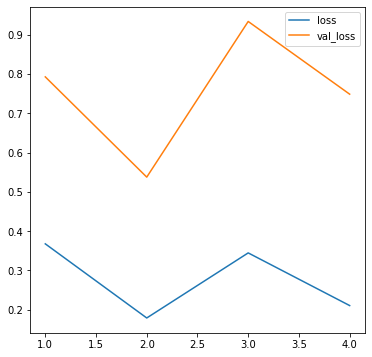

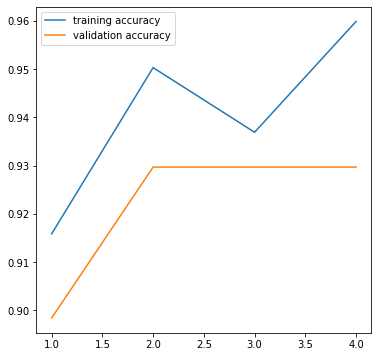

In [40]:
plt.figure(figsize=(6,6)) 

loss1=result_x.history['loss']
val_loss1=result_x.history['val_loss']
epochs=range(1,len(loss1)+1)

plt.plot(epochs,loss1,label='loss')
plt.plot(epochs,val_loss1,label='val_loss')

plt.legend()


plt.figure(figsize=(6,6))

acc1=result_x.history['accuracy']
val_acc1=result_x.history['val_accuracy']

plt.plot(epochs,acc1,label='training accuracy')
plt.plot(epochs,val_acc1,label='validation accuracy')

plt.legend()